## 任务1：构建一个简单CNN模型，训练有标签数据

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from PIL import Image
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
# 定义一个函数，用于设置随机种子
def set_seed(seed):
    # 设置PyTorch的随机种子
    torch.manual_seed(seed)
    # 设置NumPy的随机种子
    np.random.seed(seed)
    # 如果设备是CUDA，则设置所有CUDA设备的随机种子
    if device == "cuda":
        torch.cuda.manual_seed_all(seed)

set_seed(42)
    

In [30]:
# 图像预处理

train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ),(0.5, ))
])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ),(0.5, ))
])


In [31]:
# 数据加载

train_dir = "F:/Ai/Data/food-11/training/labeled"
val_dir = "F:/Ai/Data/food-11/validation"

In [32]:
train_set = datasets.ImageFolder(train_dir, transform=train_transform)
val_set = datasets.ImageFolder(val_dir, transform=test_transform)

trian_loader = DataLoader(train_set, batch_size=256, shuffle=True)
val_loader = DataLoader(val_set, batch_size=256, shuffle=False)

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    """显示图像"""
    img = img / 2 + 0.5  # 反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

def visualize_dataset(dataset, title, num_images=8, cols=4):
    """可视化数据集中的样本"""
    # 随机选择一些样本
    indices = np.random.choice(len(dataset), num_images, replace=False)
    images = [dataset[i][0] for i in indices]
    labels = [dataset.classes[dataset[i][1]] for i in indices]
    
    # 创建网格显示
    rows = int(np.ceil(num_images / cols))
    plt.figure(figsize=(12, 3*rows))
    plt.suptitle(title, fontsize=16)
    
    for i, (img, label) in enumerate(zip(images, labels)):
        plt.subplot(rows, cols, i+1)
        imshow(img)
        plt.title(label, fontsize=10)
    
    plt.tight_layout()
    plt.show()

def visualize_dataloader(dataloader, title, num_images=8, cols=4):
    """可视化DataLoader中的批次数据"""
    # 获取一个批次的数据
    dataiter = iter(dataloader)
    images, labels = next(dataiter)
    
    # 显示图像
    rows = int(np.ceil(num_images / cols))
    plt.figure(figsize=(12, 3*rows))
    plt.suptitle(title, fontsize=16)
    
    for i in range(min(num_images, len(images))):
        plt.subplot(rows, cols, i+1)
        imshow(images[i])
        plt.title(dataloader.dataset.classes[labels[i]], fontsize=10)
    
    plt.tight_layout()
    plt.show()

C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:29: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:29: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:29: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:29: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:29: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:29: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) miss

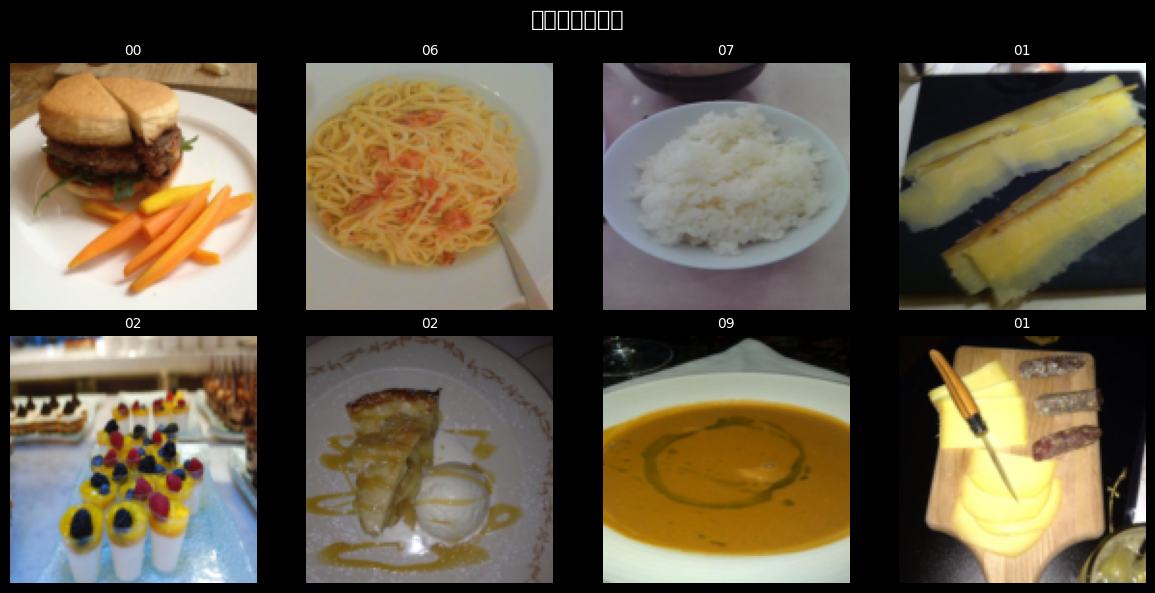

C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:48: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:48: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:48: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:48: UserWarning: Glyph 25209 (\N{CJK UNIFIED IDEOGRAPH-6279}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:48: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  plt.tight_layout()
C:\Users\ChenYL\AppData\Local\Temp\ipykernel_3304\3504754398.py:48: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) miss

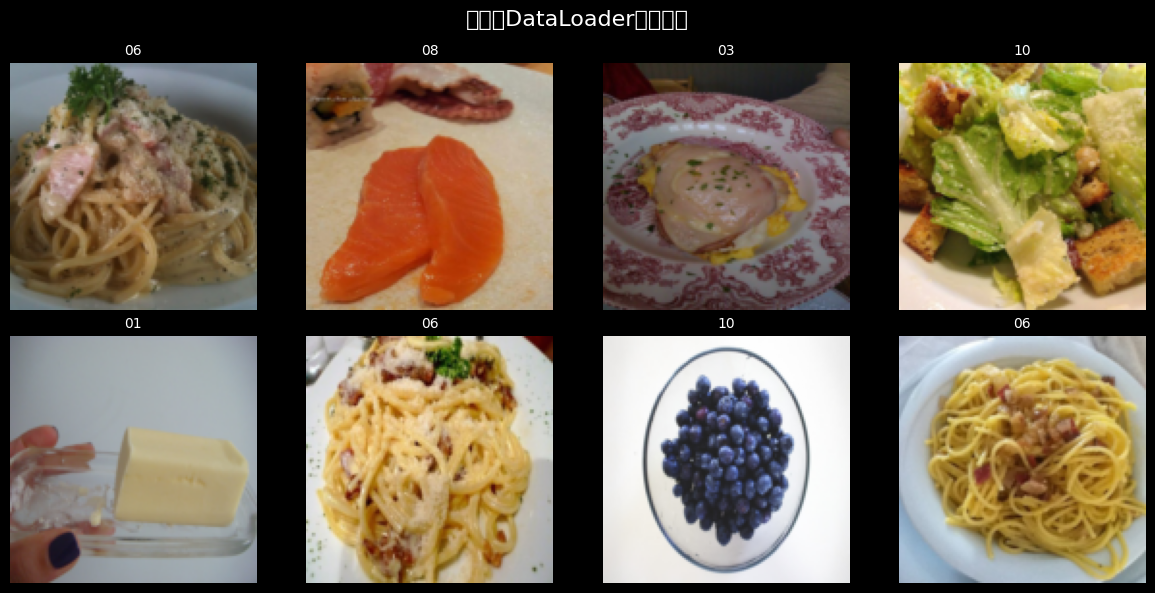

In [34]:
# 可视化训练集
visualize_dataset(train_set, "训练集样本示例")
visualize_dataloader(trian_loader, "训练集DataLoader批次示例")

In [35]:
train_set

Dataset ImageFolder
    Number of datapoints: 3080
    Root location: F:/Ai/Data/food-11/training/labeled
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [36]:
# 简单CNN网络

class simpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, 11)
        )

    def forward(self, x):
        return self.fc(self.cnn(x))


In [37]:
model = simpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [38]:
# 验证函数
def validate():
    model.eval()
    correct = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = model(imgs)
            correct += (preds.argmax(1) == labels).sum().item()
    acc = correct / len(val_set)
    print(f"[EASY][Validation] Acc: {acc:.4f}")

In [39]:
# 训练函数

def train(epochs = 10):
    # 遍历每个epoch
    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0

        for imgs, labels in trian_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
        
        acc = correct / len(train_set)

        print(f"[EASY][Epoch {epoch+1}] Loss: {total_loss:.3f}, Train Acc: {acc:.4f}")
        validate()



In [40]:
%time train(epochs=10)

[EASY][Epoch 1] Loss: 31.785, Train Acc: 0.1153
[EASY][Validation] Acc: 0.1258
[EASY][Epoch 2] Loss: 29.878, Train Acc: 0.1782
[EASY][Validation] Acc: 0.1894
[EASY][Epoch 3] Loss: 28.177, Train Acc: 0.2299
[EASY][Validation] Acc: 0.2333
[EASY][Epoch 4] Loss: 25.964, Train Acc: 0.2925
[EASY][Validation] Acc: 0.2818
[EASY][Epoch 5] Loss: 25.114, Train Acc: 0.3062
[EASY][Validation] Acc: 0.2848
[EASY][Epoch 6] Loss: 24.208, Train Acc: 0.3529
[EASY][Validation] Acc: 0.2894
[EASY][Epoch 7] Loss: 23.299, Train Acc: 0.3649
[EASY][Validation] Acc: 0.2955
[EASY][Epoch 8] Loss: 21.876, Train Acc: 0.4049
[EASY][Validation] Acc: 0.2955
[EASY][Epoch 9] Loss: 20.806, Train Acc: 0.4448
[EASY][Validation] Acc: 0.3333
[EASY][Epoch 10] Loss: 19.297, Train Acc: 0.4987
[EASY][Validation] Acc: 0.3000
CPU times: total: 2min 21s
Wall time: 2min 16s


## 任务二：使用不同模型架构或数据增强的带标签图像来提升性能

In [48]:
# 改进网络结构
class BetterCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, 11)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x

In [42]:
model = BetterCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [43]:
%time train(epochs=10)

[EASY][Epoch 1] Loss: 141.851, Train Acc: 0.1201
[EASY][Validation] Acc: 0.1485
[EASY][Epoch 2] Loss: 39.013, Train Acc: 0.1532
[EASY][Validation] Acc: 0.1803
[EASY][Epoch 3] Loss: 29.010, Train Acc: 0.2185
[EASY][Validation] Acc: 0.2182
[EASY][Epoch 4] Loss: 26.756, Train Acc: 0.2630
[EASY][Validation] Acc: 0.2576
[EASY][Epoch 5] Loss: 25.908, Train Acc: 0.3130
[EASY][Validation] Acc: 0.2909
[EASY][Epoch 6] Loss: 25.412, Train Acc: 0.3234
[EASY][Validation] Acc: 0.2818
[EASY][Epoch 7] Loss: 24.604, Train Acc: 0.3494
[EASY][Validation] Acc: 0.2636
[EASY][Epoch 8] Loss: 23.677, Train Acc: 0.3484
[EASY][Validation] Acc: 0.2545
[EASY][Epoch 9] Loss: 23.640, Train Acc: 0.3701
[EASY][Validation] Acc: 0.2909
[EASY][Epoch 10] Loss: 22.943, Train Acc: 0.4036
[EASY][Validation] Acc: 0.3091
CPU times: total: 2min 22s
Wall time: 2min 17s


In [44]:
class Food11VGG(nn.Module):
    def __init__(self, num_classes = 11):
        super(Food11VGG, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 8 * 8, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [45]:
model = Food11VGG(num_classes=11).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [46]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in trian_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}, Train Acc: {train_acc:.4f}")

    # 验证
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Validation Acc: {val_acc:.4f}")


Epoch 1/20, Loss: 62.0078, Train Acc: 0.0964
Validation Acc: 0.1152
Epoch 2/20, Loss: 35.6362, Train Acc: 0.1062
Validation Acc: 0.1091
Epoch 3/20, Loss: 32.8249, Train Acc: 0.1058
Validation Acc: 0.1364
Epoch 4/20, Loss: 31.4416, Train Acc: 0.1179
Validation Acc: 0.1576
Epoch 5/20, Loss: 31.2172, Train Acc: 0.1351
Validation Acc: 0.1515
Epoch 6/20, Loss: 31.1803, Train Acc: 0.1253
Validation Acc: 0.1333
Epoch 7/20, Loss: 31.3192, Train Acc: 0.1266
Validation Acc: 0.1788
Epoch 8/20, Loss: 30.1660, Train Acc: 0.1448
Validation Acc: 0.1833
Epoch 9/20, Loss: 30.2090, Train Acc: 0.1503
Validation Acc: 0.1591
Epoch 10/20, Loss: 30.0111, Train Acc: 0.1601
Validation Acc: 0.1803
Epoch 11/20, Loss: 30.3224, Train Acc: 0.1565
Validation Acc: 0.1818
Epoch 12/20, Loss: 29.4485, Train Acc: 0.1805
Validation Acc: 0.1955
Epoch 13/20, Loss: 29.5206, Train Acc: 0.1773
Validation Acc: 0.1970
Epoch 14/20, Loss: 29.5620, Train Acc: 0.1828
Validation Acc: 0.1924
Epoch 15/20, Loss: 29.3554, Train Acc: 0.18

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset
from torchvision.datasets import DatasetFolder

# This is for the progress bar.
from tqdm.auto import tqdm

In [3]:
train_tfm = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

test_tfm = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [4]:
batch_size = 128

train_set = DatasetFolder("F:/Ai/Data/food-11/training/labeled", loader=lambda x: Image.open(x), extensions="jpg", transform=train_tfm)
valid_set = DatasetFolder("F:/Ai/Data/food-11/validation", loader=lambda x: Image.open(x), extensions="jpg", transform=test_tfm)
unlabeled_set = DatasetFolder("F:/Ai/Data/food-11/training/unlabeled", loader=lambda x: Image.open(x), extensions="jpg", transform=train_tfm)
test_set = DatasetFolder("F:/Ai/Data/food-11/testing", loader=lambda x: Image.open(x), extensions="jpg", transform=test_tfm)


In [5]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [6]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # The arguments for commonly used modules:
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)

        # input image size: [3, 128, 128]
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(4, 4, 0),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 11)
        )

    def forward(self, x):
        # input (x): [batch_size, 3, 128, 128]
        # output: [batch_size, 11]

        # Extract features by convolutional layers.
        x = self.cnn_layers(x)

        # The extracted feature map must be flatten before going to fully-connected layers.
        x = x.flatten(1)

        # The features are transformed by fully-connected layers to obtain the final logits.
        x = self.fc_layers(x)
        return x

In [7]:
def get_pseudo_labels(dataset, model, threshold=0.65):
    # This functions generates pseudo-labels of a dataset using given model.
    # It returns an instance of DatasetFolder containing images whose prediction confidences exceed a given threshold.
    # You are NOT allowed to use any models trained on external data for pseudo-labeling.
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Construct a data loader.
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Make sure the model is in eval mode.
    model.eval()
    # Define softmax function.
    softmax = nn.Softmax(dim=-1)

    # Iterate over the dataset by batches.
    for batch in tqdm(data_loader):
        img, _ = batch

        # Forward the data
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
            logits = model(img.to(device))

        # Obtain the probability distributions by applying softmax on logits.
        probs = softmax(logits)

        # ---------- TODO ----------
        # Filter the data and construct a new dataset.

    # # Turn off the eval mode.
    model.train()
    return dataset

In [9]:
# "cuda" only when GPUs are available.
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize a model, and put it on the device specified.
model = Classifier().to(device)
model.device = device

# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer, you may fine-tune some hyperparameters such as learning rate on your own.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)

# The number of training epochs.
n_epochs = 80

# Whether to do semi-supervised learning.
do_semi = False

for epoch in range(n_epochs):
    # ---------- TODO ----------
    # In each epoch, relabel the unlabeled dataset for semi-supervised learning.
    # Then you can combine the labeled dataset and pseudo-labeled dataset for the training.
    if do_semi:
        # Obtain pseudo-labels for unlabeled data using trained model.
        pseudo_set = get_pseudo_labels(unlabeled_set, model)

        # Construct a new dataset and a data loader for training.
        # This is used in semi-supervised learning only.
        concat_dataset = ConcatDataset([train_set, pseudo_set])
        train_loader = DataLoader(concat_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch

        # Forward the data. (Make sure data and model are on the same device.)
        logits = model(imgs.to(device))

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(logits, labels.to(device))

        # Gradients stored in the parameters in the previous step should be cleared out first.
        optimizer.zero_grad()

        # Compute the gradients for parameters.
        loss.backward()

        # Clip the gradient norms for stable training.
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=10)

        # Update the parameters with computed gradients.
        optimizer.step()

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc)

    # The average loss and accuracy of the training set is the average of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Print the information.
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
          logits = model(imgs.to(device))

        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels.to(device))

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc)

    # The average loss and accuracy for entire validation set is the average of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Print the information.
    print(f"[ Valid | {epoch + 1:03d}/{n_epochs:03d} ] loss = {valid_loss:.5f}, acc = {valid_acc:.5f}")

PicklingError: Can't pickle <function <lambda> at 0x00000206E9A88700>: attribute lookup <lambda> on __main__ failed